# **Optimización de la Mezcla de Concreto para Máxima Resistencia y Menor Costo**
---
## 🎯 **Objetivo general:**
Determinar la combinación óptima de materiales en la mezcla de concreto que minimice costos y garantice la mayor resistencia posible.

## 🎯 **Objetivos específicos:**
Analizar la relación entre los materiales utilizados y la resistencia obtenida.
Aplicar modelos matemáticos para predecir la resistencia a la compresión.
Implementar un modelo de optimización que minimice costos manteniendo altos niveles de resistencia.
Evaluar la viabilidad de las mezclas óptimas obtenidas





# **Definición de la función a optimizar**
El objetivo es minimizar el costo de los materiales de la mezcla de concreto, asegurando que la resistencia a la compresión sea igual o mayor a un valor objetivo.
Nuestra función objetivo será:

Costo total=Cc x cemento + Cs x escoria + Ca x ceniza + Cw x agua + Cp x superplastificante + Cg x agregado grueso + Cf x agregado fino

Donde:

Cc, Cs, Ca, Cw, Cp, Cg, Cf  son los costos unitarios de cada material ($/kg).

Las variables representan la cantidad de cada material en la mezcla.

​
 

---

### 📌 Restricciones
Se debe cumplir con una resistencia a la compresión mínima (𝑅min), basada en la relación entre los materiales y la resistencia real del dataset.
Podemos ajustar esto con un modelo de regresión para predecir la resistencia en función de los materiales.

Suma de proporciones de materiales:
La mezcla debe cumplir con una cantidad total de materiales adecuada para formar concreto.

Límites en cada material:
No se pueden usar cantidades excesivas o insuficientes de un material, respetando rangos típicos de diseño



### 📌 Deducción y explicación de las ecuaciones
Usaremos un modelo de regresión basado en el dataset para obtener la ecuación que predice la resistencia:

𝑅 = 𝑓 (cemento, escoria, ceniza, agua, superplastificante, agregado grueso, agregado fino)
Con esta ecuación, podemos agregar la restricción:

𝑓 (cemento, escoria, ceniza, agua, superplastificante, agregado grueso, agregado fino) ≥ 𝑅 min
⁡ 
El modelo de optimización buscará minimizar el costo respetando esta restricción.

### 📌 Definición de Parámetros
Cc, Cs, Ca, Cw, Cp, Cg, Cf  Costo unitario de los materiales (se puede definir con datos del mercado).
𝑅min : Resistencia mínima deseada en MPa
⁡
cemento, escoria, ceniza, agua, superplastificante, agregado grueso, agregado fino

Variables de decisión (cantidades de cada material en kg/m³).

### 📌 Descripción del Dataset
### 🔍 Contexto y Origen
Este dataset proviene de estudios sobre la resistencia del concreto en función de su composición. Se ha utilizado en múltiples investigaciones sobre el diseño óptimo de mezclas para mejorar la resistencia del material. La resistencia a la compresión es una de las propiedades más importantes del concreto, y su predicción permite optimizar su diseño, reduciendo costos y mejorando su desempeño estructural.

Este conjunto de datos se ha utilizado en modelos de machine learning y en análisis de optimización para encontrar mezclas más eficientes.
| Variable        | Descripción | Unidades |
|----------------|------------|----------|
| **cement**     | Cantidad de cemento en la mezcla | kg/m³ |
| **slag**       | Cantidad de escoria granulada de alto horno | kg/m³ |
| **ash**        | Cantidad de ceniza volante utilizada | kg/m³ |
| **water**      | Cantidad de agua en la mezcla | kg/m³ |
| **superplastic** | Dosis de superplastificante | kg/m³ |
| **coarseagg**  | Cantidad de agregado grueso | kg/m³ |
| **fineagg**    | Cantidad de agregado fino | kg/m³ |
| **age**        | Edad del concreto al momento de la prueba | días |
| **strength**   | Resistencia a la compresión | MPa |


In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Cargar datos
df = pd.read_csv('concrete.csv')
df.head(15)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


Primeras 5 filas:
   cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29  

Dimensiones del dataset (filas, columnas):
(1030, 9)

Valores nulos por columna:
cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

Tipos de datos de las columnas:
cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
a


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


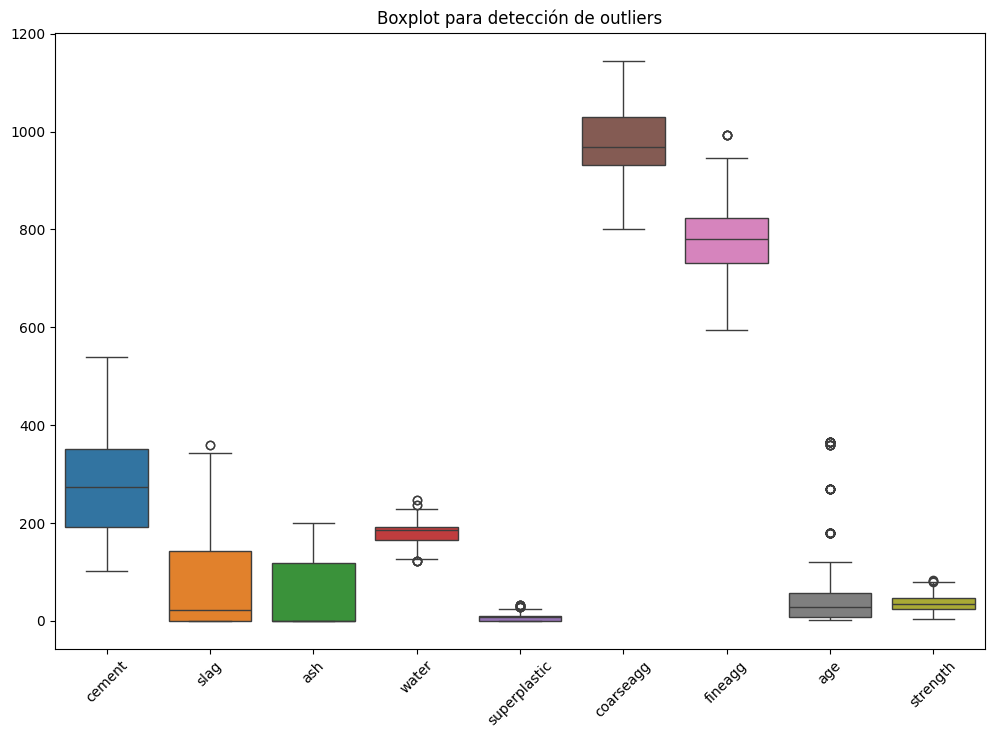

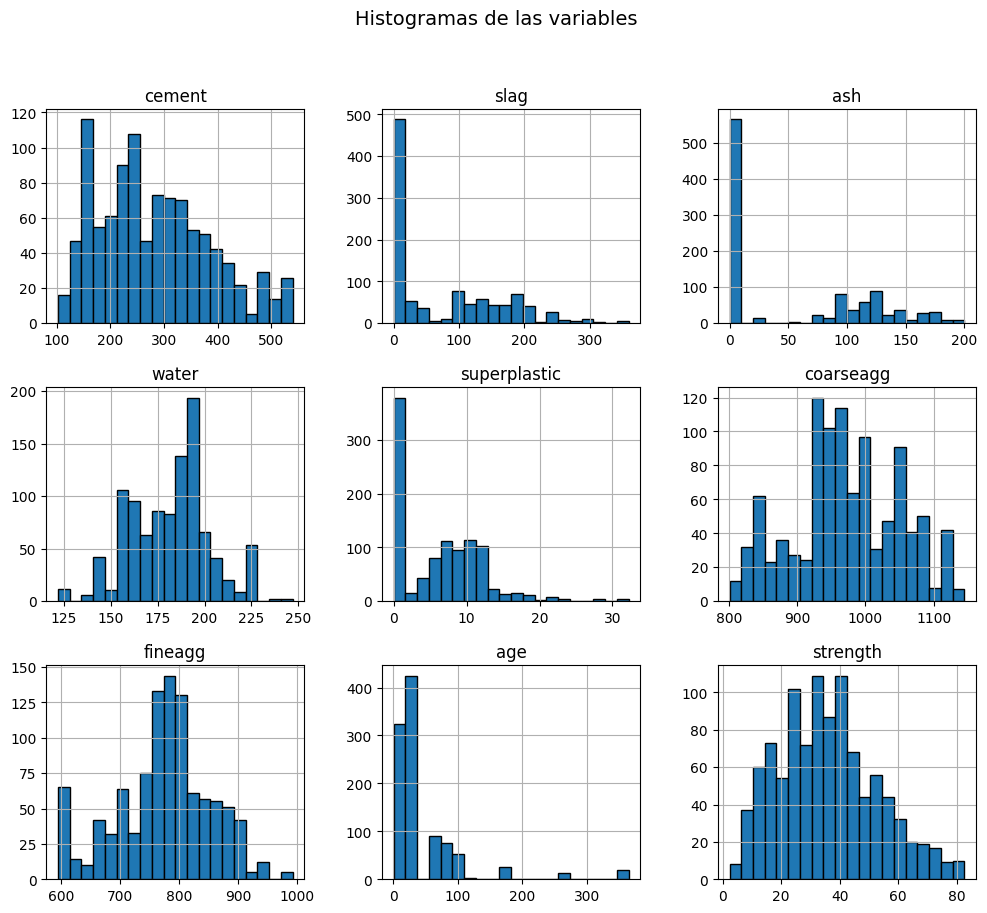

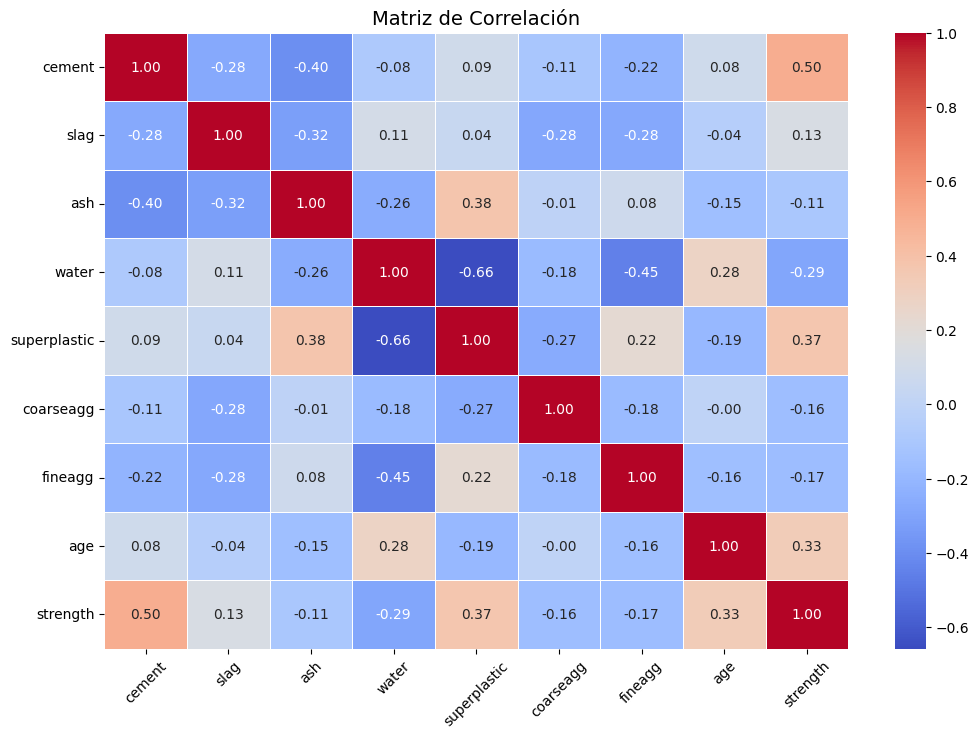

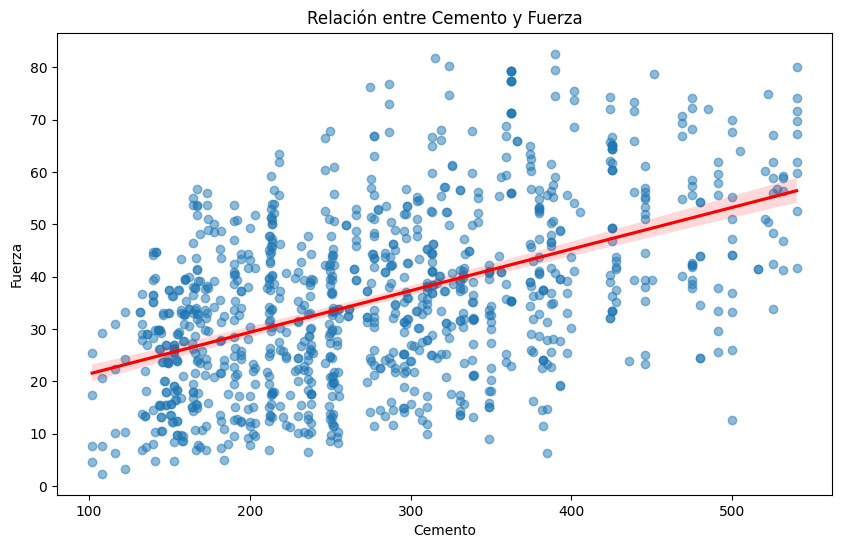

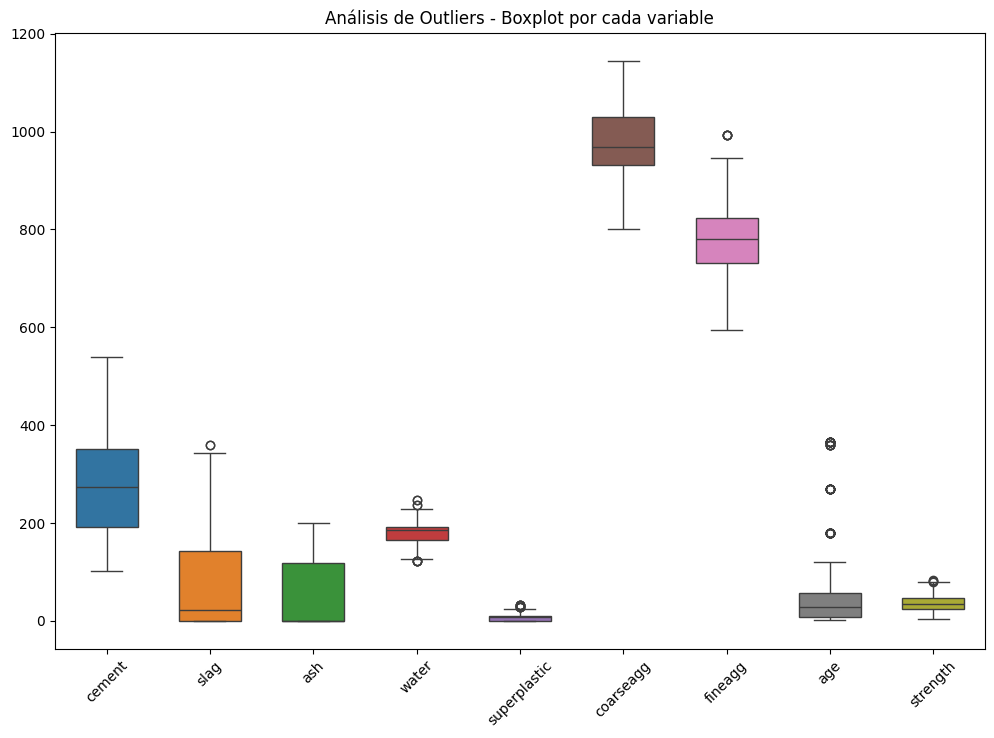

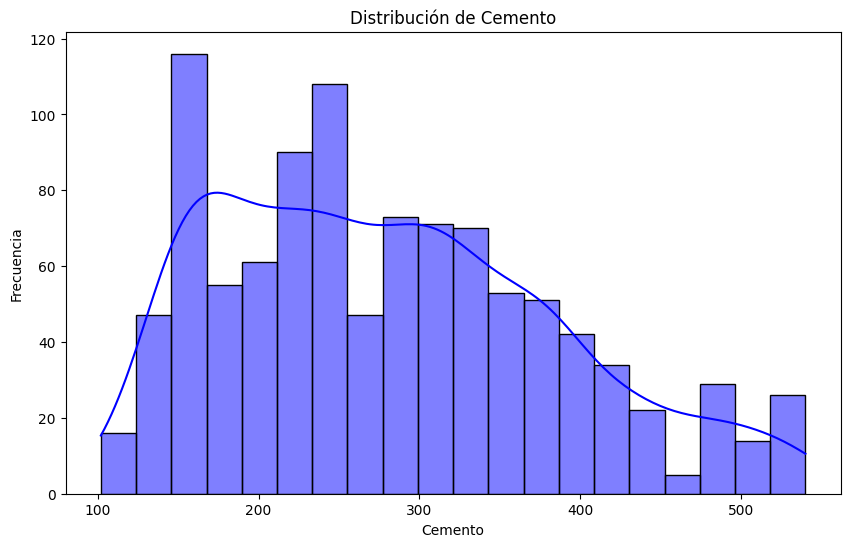

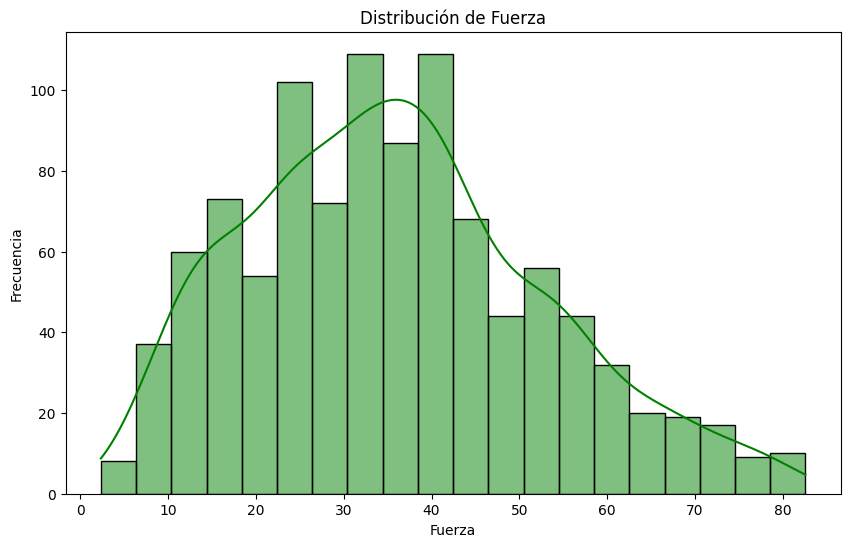

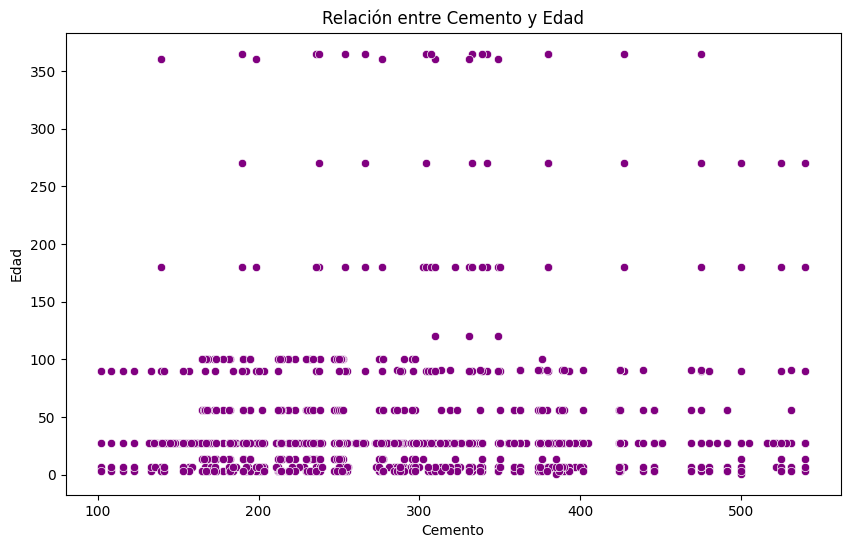

In [24]:
# Instalar librerías 
!pip install matplotlib seaborn pandas

# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo CSV en un DataFrame
df = pd.read_csv('concrete.csv')

# Mostrar las primeras 5 filas
print("Primeras 5 filas:")
print(df.head())

# Verificar dimensiones del dataset
print("\nDimensiones del dataset (filas, columnas):")
print(df.shape)

# Verificar si hay valores nulos en las columnas
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Verificar los tipos de datos de las columnas
print("\nTipos de datos de las columnas:")
print(df.dtypes)

# Calcular estadísticas descriptivas para las medidas centrales y de dispersión
print("\nEstadística descriptiva (mean, std, min, 25%, 50%, 75%, max):")
print(df.describe())

# Calcular la mediana para cada columna
print("\nMediana por columna:")
print(df.median())

# Calcular la desviación estándar para cada columna
print("\nDesviación estándar por columna:")
print(df.std())

# Calcular el rango para cada columna (máximo - mínimo)
print("\nRango por columna:")
range_df = df.describe().loc[['max', 'min']].T
range_df['rango'] = range_df['max'] - range_df['min']
print(range_df[['rango']])

# 2. Análisis de outliers (boxplots por variable)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title("Boxplot para detección de outliers")
plt.xticks(rotation=45)  # Para que los nombres de las columnas se lean mejor
plt.show()

# 3. Gráficos de distribución (histogramas)
df.hist(bins=20, figsize=(12, 10), edgecolor='black')
plt.suptitle("Histogramas de las variables", fontsize=14)
plt.show()

# 4. Matriz de correlación con valores ajustados para mejor visualización
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlación", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# 5. Relación entre Cemento y Fuerza con tendencia
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='cement', y='strength', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Relación entre Cemento y Fuerza")
plt.xlabel("Cemento")
plt.ylabel("Fuerza")
plt.show()

# 6. Análisis de outliers a través de Boxplots por variable (detalle adicional)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, width=0.6)
plt.title("Análisis de Outliers - Boxplot por cada variable")
plt.xticks(rotation=45)
plt.show()

# 7. Distribución de variables específicas (ejemplo: Cemento)
plt.figure(figsize=(10, 6))
sns.histplot(df['cement'], bins=20, kde=True, color='blue')
plt.title("Distribución de Cemento")
plt.xlabel("Cemento")
plt.ylabel("Frecuencia")
plt.show()

# 8. Histograma de Strength
plt.figure(figsize=(10, 6))
sns.histplot(df['strength'], bins=20, kde=True, color='green')
plt.title("Distribución de Fuerza")
plt.xlabel("Fuerza")
plt.ylabel("Frecuencia")
plt.show()

# 9. Análisis de la relación entre Cemento y la Edad (Age)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='cement', y='age', color='purple')
plt.title("Relación entre Cemento y Edad")
plt.xlabel("Cemento")
plt.ylabel("Edad")
plt.show()



### 📌 **Interpretación de la correlación:**
- **Cemento y resistencia**: Hay una fuerte correlación positiva, lo que indica que una mayor cantidad de cemento generalmente aumenta la resistencia del concreto.
- **Agua y resistencia**: La correlación es negativa, lo que sugiere que más agua en la mezcla podría debilitar la resistencia del concreto.
- **Agregados gruesos y finos**: No muestran una relación clara con la resistencia. Podría ser interesante investigar más a fondo cómo estos materiales afectan el resultado final.

### 📌 **Justificación de la optimización:**
El análisis muestra que ciertos materiales influyen significativamente en la resistencia del concreto, como el cemento. Sin embargo, los costos varían, y no siempre más cemento es la solución más económica o eficiente. Por ello, el objetivo de la optimización es encontrar la mezcla ideal que maximice la resistencia sin comprometer los costos de producción.

---


### **Análisis del Conjunto de Datos:**
- **Primeras 5 filas del dataset:**
Se muestran los primeros valores del conjunto de datos, como cemento, ceniza y agua.

- **Valores nulos:**
No hay valores nulos, por lo que no se requiere imputación de datos.

- **Tipos de datos:**
Todos los datos son numéricos (float64), adecuados para análisis y modelos.

- **Estadísticas descriptivas:**
Se calcularon la media, desviación estándar, valores extremos y percentiles 25%, 50% y 75%, proporcionando un resumen de la distribución de los datos.

- **Mediana y Desviación Estándar:**
Se calculó la mediana y desviación estándar para observar la tendencia central y la variabilidad de las variables.

- **Rango:**
El rango (máximo - mínimo) se calculó para cada variable, indicando la extensión de los valores.

### **Análisis visual:**
- **Boxplot para outliers:**
El boxplot ayuda a detectar valores atípicos. Los puntos fuera de los "bigotes" se consideran outliers.

- **Histogramas:**
Los histogramas muestran la distribución de las variables y si siguen una distribución normal o sesgada.

- **Matriz de Correlación (Heatmap):**
La matriz de correlación muestra la relación entre las variables, como la fuerte correlación entre cemento y fuerza.

- **Gráfico de dispersión (Scatterplot):**
El scatterplot entre cemento y fuerza revela si existe una relación lineal entre estas variables.
